In [1]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import wrangle as wr
import evaluate as ev

# Ecercises:

## 1. Load your zillow dataset.

In [2]:
df = wr.wrangle_zillow()
train, validate, test = wr.split_zillow_data(df)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

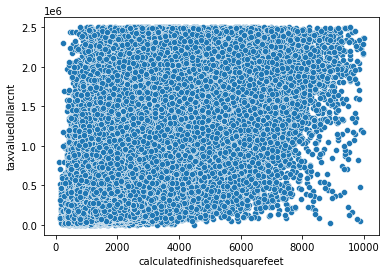

In [3]:
sns.scatterplot(data = df[df.calculatedfinishedsquarefeet < 10000], x = df[df.calculatedfinishedsquarefeet < 10000].calculatedfinishedsquarefeet, y = df[df.calculatedfinishedsquarefeet < 65000].taxvaluedollarcnt)

In [4]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,propertylandusedesc,county
115205,4,3.0,2102.0,280426.0,1964,3720.09,Single Family Residential,Los Angeles County
1728163,2,2.0,1703.0,574720.0,1937,6845.50,Single Family Residential,Los Angeles County
1120641,3,2.0,1084.0,441000.0,1954,5371.55,Single Family Residential,Los Angeles County
1282524,2,1.0,825.0,304484.0,1943,3666.61,Single Family Residential,Los Angeles County
1902970,4,1.5,1249.0,240762.0,1963,2997.56,Single Family Residential,Orange County


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsquarefeet.

### Creating a DataFrame consisting of square feet and the home value, and adding the baseline value prediction (the mean of all original values):

In [5]:
regression_df = train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
#Adding a column for the baseline model's prediction for the home value:
regression_df['baseline_prediction'] = regression_df.taxvaluedollarcnt.mean()
regression_df.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_prediction
115205,2102.0,280426.0,412737.002379
1728163,1703.0,574720.0,412737.002379
1120641,1084.0,441000.0,412737.002379
1282524,825.0,304484.0,412737.002379
1902970,1249.0,240762.0,412737.002379


### Separating the independent (square footage) and dependent (home value) variables to create the regression object, then using this model to make predictions about home values:

In [6]:
#Assigning the total square feet as the independent variable:
X = train[['calculatedfinishedsquarefeet']]
#Assigning the home value as the dependent variable:
y = train[['taxvaluedollarcnt']]

#Creating the linear regression object with X and y:
model = LinearRegression().fit(X, y)
#Using the model to generate predictions with the linear regression:
predictions = model.predict(X)

### Calculating the regression model's value predictions for each property and adding them to the DataFrame:

In [7]:
regression_df['regression_prediction'] = predictions

In [8]:
regression_df.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_prediction,regression_prediction
115205,2102.0,280426.0,412737.002379,484773.946543
1728163,1703.0,574720.0,412737.002379,382589.461371
1120641,1084.0,441000.0,412737.002379,224062.653548
1282524,825.0,304484.0,412737.002379,157732.373700
1902970,1249.0,240762.0,412737.002379,266319.395537


## 3. Plot the residuals for the linear regression model that you made.

### Adding columns to the DataFrame that represent the residuals produced by both the baseline and regression models:

Important Note: It is important to remember that residuals should be calculated by subtracting the <mark><i>models' predictions from the original value</i></mark>.
- I first subtracted the original value from the models' predictions, flipping the plots and making the data much less easy to interpret. 

#### Creating column for the baseline residual:

In [9]:
regression_df['baseline_residual'] = regression_df.taxvaluedollarcnt - regression_df.baseline_prediction

#### Creating column for the regression residual:

In [10]:
regression_df['regression_residual'] = regression_df.taxvaluedollarcnt - regression_df.regression_prediction

In [11]:
regression_df.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_prediction,regression_prediction,baseline_residual,regression_residual
115205,2102.0,280426.0,412737.002379,484773.946543,-132311.002379,-204347.946543
1728163,1703.0,574720.0,412737.002379,382589.461371,161982.997621,192130.538629
1120641,1084.0,441000.0,412737.002379,224062.653548,28262.997621,216937.346452
1282524,825.0,304484.0,412737.002379,157732.373700,-108253.002379,146751.626300
1902970,1249.0,240762.0,412737.002379,266319.395537,-171975.002379,-25557.395537


### Creating the plots to compare the residuals betweent the baseline and the regression models:

In [12]:
regression_df[regression_df.calculatedfinishedsquarefeet == regression_df.calculatedfinishedsquarefeet.max()]

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_prediction,regression_prediction,baseline_residual,regression_residual
182432,9996.0,2359473.0,412737.002379,2.506439e+06,1.946736e+06,-146965.923851


Note: I'm going to create a DataFrame that samples the test set, rather than plotting all 1,000,000+ points. There is one datapoint that has a square footage value of over 500,000. This seems to be an outlier and thus throws off the plotting. 

In [13]:
regression_df.shape[0]

1181555

#### Baseline Residual Plots:

[Text(0.5, 1.0, 'Baseline Residuals in Relation to Square Footage')]

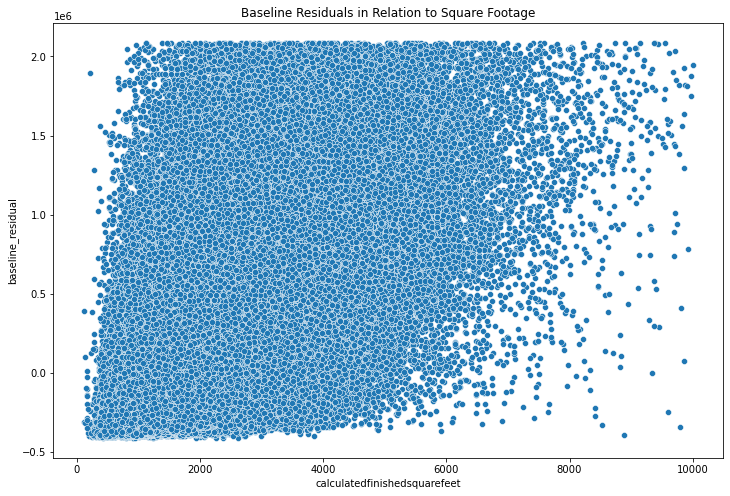

In [14]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = regression_df, x = regression_df.calculatedfinishedsquarefeet, y = regression_df.baseline_residual).set(title = 'Baseline Residuals in Relation to Square Footage')

[Text(0.5, 1.0, 'Baseline Residuals in Relation to Home Price')]

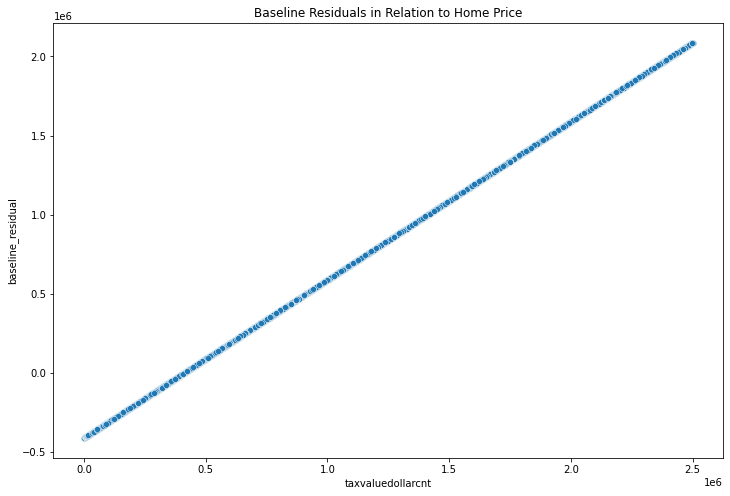

In [15]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = regression_df, x = regression_df.taxvaluedollarcnt, y = regression_df.baseline_residual).set(title = 'Baseline Residuals in Relation to Home Price')

#### Regression Residual Plots:

[Text(0.5, 1.0, 'Regression Residuals in Relation to Square Footage')]

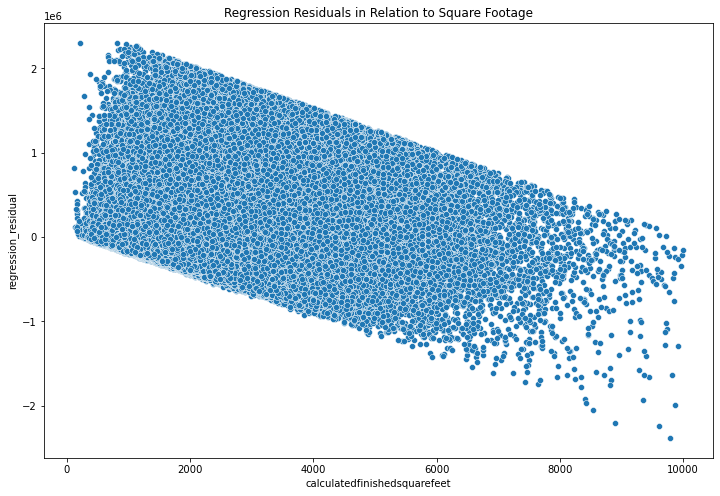

In [16]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = regression_df, x = regression_df.calculatedfinishedsquarefeet, y = regression_df.regression_residual).set(title = 'Regression Residuals in Relation to Square Footage')

[Text(0.5, 1.0, 'Regression Residuals in Relation to Home Price')]

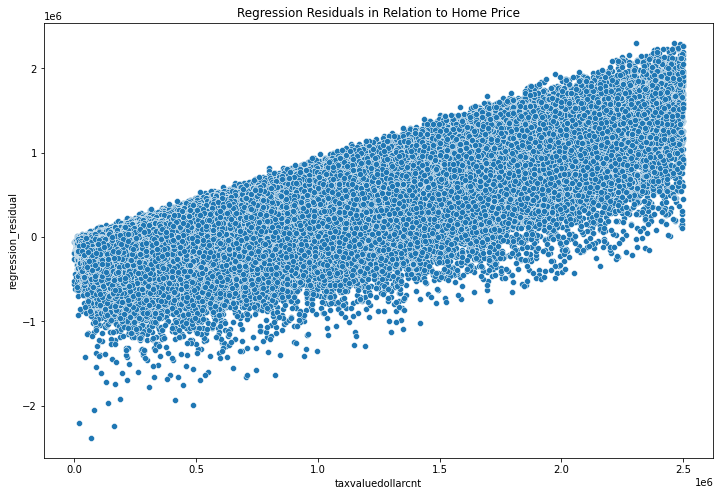

In [17]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = regression_df, x = regression_df.taxvaluedollarcnt, y = regression_df.regression_residual).set(title = 'Regression Residuals in Relation to Home Price')

### Some Notes About These Residuals:
- Baseline:
    - It is clear that the baseline residual in relation to square footage seems to be much more scattered than the residuals generated by the regression model. 
    - The opposite appears to be true for the baseline residual in relation to provided home price, which makes sense seeing as the relationship of price to a mean price would be linear, with a slope of 1, in either direction. 
- Regression:
    - The regression model seems to underestimate value at lower square footage, and overestimate value at higher square footage (relative to values provided in the data).
    - The regression model also seem to generall underestimate value relative to the provided home price for lower priced homes, is more accurate toward the middle, and then begins to underestimate values relative to provided price for higher priced homes. 
        - This make sense, since the regression model should reasonably be expected to guess somewhere toward the middle when approaching either extreme.
- In General:
    - It's very interesting that the residuals for both seem to reach into the millions.

## 4 & 5. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for the baseline and your model.
- NOTE: I'm grouping these questions together so that I can make easier comparisons between the models, closer together in the notebook. I'm hoping it will help make their relationships easier to interpret.

In [18]:
regression_df.head(5)

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_prediction,regression_prediction,baseline_residual,regression_residual
115205,2102.0,280426.0,412737.002379,484773.946543,-132311.002379,-204347.946543
1728163,1703.0,574720.0,412737.002379,382589.461371,161982.997621,192130.538629
1120641,1084.0,441000.0,412737.002379,224062.653548,28262.997621,216937.346452
1282524,825.0,304484.0,412737.002379,157732.373700,-108253.002379,146751.626300
1902970,1249.0,240762.0,412737.002379,266319.395537,-171975.002379,-25557.395537


### a. Sum of Squared Errors:

I followed the curriculum here, but I don't really understand what is happening, so I need to come back to this. 

#### Baseline:

##### Calculating the baseline SSE manually before using the module, so that I can see how it's done:

In [19]:
#Adding a column that contains the y-hat (mean prediction) for the baseline model:
regression_df['baseline_yhat'] = regression_df.baseline_prediction.mean()
regression_df.head(2)

#It is worth noting that it makes sense for a baseline that the yhat and the prediction will be the same,
#as the baseline prediction is the same mean value for all lines.

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_prediction,regression_prediction,baseline_residual,regression_residual,baseline_yhat
115205,2102.0,280426.0,412737.002379,484773.946543,-132311.002379,-204347.946543,412737.00238
1728163,1703.0,574720.0,412737.002379,382589.461371,161982.997621,192130.538629,412737.00238


In [20]:
#Adding a column that will contain the residual squared for each record in the DataFrame:
regression_df['baseline_residual_squared'] = regression_df.baseline_residual ** 2

In [21]:
#Calculating the Baseline SSE by adding up all the squared residual values:
manual_baseline_sse = regression_df.baseline_residual_squared.sum()
manual_baseline_sse

1.4327737964356395e+17

##### Using the module to verify that the SSE values are the same 
- They appear to differ slightly, but that is likely due to rounding errors, rather than incorrect calculation on my part. 

In [22]:
#Using the module as shown in the curriculum:
baseline_sse = mean_squared_error(regression_df.taxvaluedollarcnt, regression_df.baseline_prediction)*len(regression_df)
baseline_sse

1.4327737964356397e+17

#### Regression Model:

In [23]:
#Adding a column that contains the y-hat (mean prediction) for the regression model:
regression_df['regression_yhat'] = regression_df.regression_prediction.mean()

In [24]:
regression_sse = mean_squared_error(regression_df.regression_prediction, regression_df.regression_yhat)*len(df)
regression_sse

9.502194045706627e+16

#### Comparison and Notes:
- It appears that the regression model does seem to perform slightly better than baseline.
- It appears that the regression is ~34% lower in error than the baseline.

In [25]:
#Calculating the reduction in error by using the regression model:
(baseline_sse - regression_sse) / (baseline_sse)

0.3367973319064349

### b. Explained Sum of Squares:
 - Simply put, this is the sum of the squares of the difference (per line) of between the model's prediction for that line and the mean *actual* value.
     - This is still pretty convoluted, but it makes sense if you read it slowly.
    

#### Baseline Model:

In [26]:
baseline_ess = sum((regression_df.baseline_prediction - (regression_df.taxvaluedollarcnt.mean())) ** 2)
baseline_ess

0.0

#### Regression Model:

In [27]:
regression_ess = sum((regression_df.regression_prediction - (regression_df.taxvaluedollarcnt.mean())) ** 2)
regression_ess

5.321227764880117e+16

#### Comparison and Notes:
- It makese sense that the ESS for baseline would be zero, since the baseline mode *is* the mean value of all the homes. 

### c. Total Sum of Squares:
- Simply put, this is the sum of the differences between each of the actual home values and the mean of the home values.
- This can effectively be calculated by adding the Explained Sum of Squares (ESS) and the Sum of Squared Errors (SSE) for each model.

#### Baseline Model:

In [28]:
baseline_tss = baseline_ess + baseline_sse
baseline_tss

1.4327737964356397e+17

#### Regression Model:

In [29]:
regression_tss = regression_ess + regression_sse
regression_tss

1.4823421810586746e+17

### d. Mean Squared Error:
- Calculated by dividing the SSE by thte total number of data points.
    - Simply put/reworded: this is the average <u>*squared*</u> error per data point.

#### Baseline:

In [30]:
baseline_mse = baseline_sse / regression_df.shape[0]
baseline_mse

121261709902.25928

#### Regression Model:

In [31]:
regression_mse = regression_sse / regression_df.shape[0]
regression_mse

80421089544.76624

### e. Root Mean Squared Error:
- Calculated by taking the square root of the Mean Squared Error (MSE) for each model.
    - Simply stated: this will return the actual amount that each model is off, on average. 

#### Baseline Model:

In [32]:
baseline_rmse = sqrt(baseline_mse)
baseline_rmse

348226.52096337994

#### Regression Model:

In [33]:
regression_rmse = sqrt(regression_mse)
regression_rmse

283586.12368161854

#### Comparison and Notes:
- It appears that on average, the RMSE is lower than baseline by about 64,640.40 per property.

In [34]:
#Calculating the difference in Mean Squared Error for each model (starting with regression model to more easily show directionality of change):
regression_rmse - baseline_rmse

-64640.3972817614

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

### Creating a function to do this that I can use in later work:

In [35]:
def compare_sse(baseline_sse, model_sse):
    '''
    Takes in the SSE values for two models (note that the baseline or initial model
    must be entered as the first of the two arguments) and returns a statement declaring whether the alternative
    model beats the baseline, and by what percentage. If the model does not beat baseline, 
    the statement will list the percentage for how much worse the model performed relative
    to the baseline.'''
    #Calculating the difference between the baseline SSE and the model SSE:
    sse_diff = baseline_sse - model_sse
    if sse_diff > 0:
        #Determining the percentage improvement for the model over baseline:
        sse_diff_pct = round(((sse_diff / baseline_sse) * 100), 2)
        #Generating a format string that includes the percentage by which the model beat baseline:
        return print(f'The model performed better than the baseline and produced {sse_diff_pct}% less error.')
    elif sse_diff < 0:
        #Calculating the percentage increase in error the model produced over baseline:
        sse_diff_pct = abs(round(((sse_diff / baseline_sse) * 100), 2))
        #Generating a format string that includes the percentage by which the model increased error over baseline:
        return print(f'The model performed worse than the baseline and produced {sse_diff_pct}% more error.')

In [36]:
compare_sse(baseline_sse, regression_sse)

The model performed better than the baseline and produced 33.68% less error.


## 7. What is the amount of variance explained in your model?
- Simply put, the variance ($R^2$) is the ration of Explained Sum of Squares (ESS) to the Total Sum of Squares (TSS) for each of the models.  

$R^2 = \frac{ESS}{TSS}$

### Baseline Model:

In [37]:
baseline_r2 = baseline_ess / baseline_tss
baseline_r2

0.0

### Regression Model:

In [38]:
regression_r2 = regression_ess / regression_tss
regression_r2

0.35897432002371726

## 8. Is your model better than baseline?

Yes, my model beats the baseline in every metric of error.  

## 9. Create a file named evaluate.py that contains the following functions.

### a. plot_residuals(y, yhat): creates a residual plot

#### Testing:

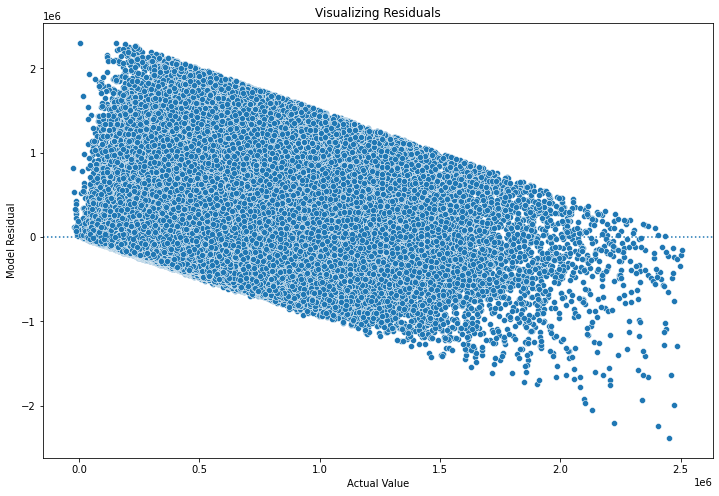

In [39]:
ev.plot_residuals(regression_df, regression_df.taxvaluedollarcnt, regression_df.regression_prediction)

### b. regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [40]:
ev.regression_errors(regression_df.taxvaluedollarcnt, regression_df.regression_prediction)

,sse,ess,tss,mse,rmse
regression_prediction,9.006510e+16,5.321228e+16,1.432774e+17,7.622591e+10,276090.397117


### c. better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [41]:
ev.better_than_baseline(regression_df.taxvaluedollarcnt, regression_df.regression_prediction)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
def better_than_baseline(baseline_sse, model_sse):
    '''
    Takes in the SSE values for two models (note that the baseline or initial model
    must be entered as the first of the two arguments) and returns a statement declaring whether the alternative
    model beats the baseline, and by what percentage. If the model does not beat baseline, 
    the statement will list the percentage for how much worse the model performed relative
    to the baseline.'''
    #Calculating the difference between the baseline SSE and the model SSE:
    sse_diff = baseline_sse - model_sse
    if sse_diff > 0:
        #Determining the percentage improvement for the model over baseline:
        sse_diff_pct = round(((sse_diff / baseline_sse) * 100), 2)
        #Generating a format string that includes the percentage by which the model beat baseline:
        return print(f'The model performed better than the baseline and produced {sse_diff_pct}% less error.')
    elif sse_diff < 0:
        #Calculating the percentage increase in error the model produced over baseline:
        sse_diff_pct = abs(round(((sse_diff / baseline_sse) * 100), 2))
        #Generating a format string that includes the percentage by which the model increased error over baseline:
        return print(f'The model performed worse than the baseline and produced {sse_diff_pct}% more error.')